<a href="https://colab.research.google.com/github/19PA1A0465/Dphi_Project_assighment/blob/main/Final_Assignment_Dphi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing all the required packages
import pandas as pd # for handling data in the form of tables
import numpy as np # For handling matrix
from sklearn.model_selection import train_test_split # For spliting the data into train and test
from sklearn import metrics # for calculation of accuracy and precision
from sklearn.metrics import confusion_matrix #performance measures
from sklearn import svm 
import seaborn as sns#for visualization
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix,classification_report,plot_precision_recall_curve,plot_roc_curve# to calculate performance of model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#Reading data from csv file

dataset = pd.read_csv('Train_Data.csv')


#**Data Description**

D_Patient_Care_Situation: Care situation of a patient during treatment

Diagnosed_Condition: The diagnosed condition of the patient

ID_Patient: Patient identifier number

Treatment_with_drugs: Class of drugs used during treatment

Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)

Patient_Age: Age of the patient

Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.

Patient_Smoker: If the patient was a smoker or not

Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country

Previous_Condition: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case.

#**Data** **Inspection** 
---


In [ ]:
# To see the first 6 rows of our dataset we use head method
dataset.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [ ]:
# To know the the no of rows and columns of our dataset we use shape method
print(dataset.shape)

(23097, 18)


In [ ]:
#To know the columns names in dataset we use columns 
print(dataset.columns)

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year'],
      dtype='object')


In [ ]:
# dtype gives data types of each  column
print(dataset.dtypes)

ID_Patient_Care_Situation      int64
Diagnosed_Condition            int64
Patient_ID                     int64
Treated_with_drugs            object
Patient_Age                    int64
Patient_Body_Mass_Index      float64
Patient_Smoker                object
Patient_Rural_Urban           object
Patient_mental_condition      object
A                            float64
B                            float64
C                            float64
D                            float64
E                            float64
F                            float64
Z                            float64
Number_of_prev_cond          float64
Survived_1_year                int64
dtype: object


In [ ]:
# To study the statastical summary of dataset we use discribe()
dataset.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


#**Data Cleaning**

In [ ]:
#To check Whether NA's (missingvalues) present in dataset
dataset.isna().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [ ]:
#Fill NA's with previous value in data set
dataset.fillna(method='pad')


,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,DX1,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,24,7671,DX6,63,27.500039,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,11,5764,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [ ]:
dataset.head(7)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
5,10808,45,7977,DX6,47,26.155120,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
6,5138,52,5296,DX3,53,19.103244,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [ ]:
dataset.isna().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [ ]:
dataset=dataset.drop('Treated_with_drugs',axis=1)


In [ ]:
dataset=dataset.drop(["A","B","C","D","E","F","Z"],axis=1)

In [ ]:
#grouping data based on outcomes
print(dataset.groupby("Survived_1_year").size())

Survived_1_year
0     8494
1    14603
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


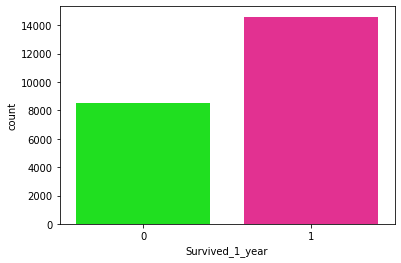

In [ ]:
sns.countplot(dataset['Survived_1_year'],label="Count",palette=['#00FF00',"#FF1493"])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


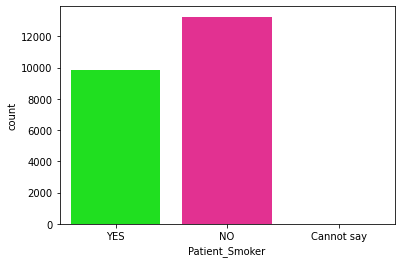

In [ ]:
sns.countplot(dataset['Patient_Smoker'],label="Count",palette=['#00FF00',"#FF1493","#FFFFFF"])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


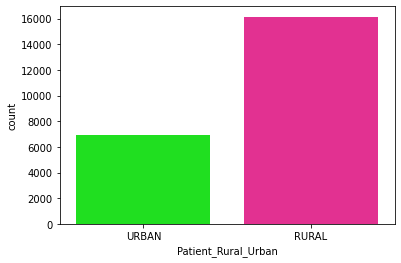

In [ ]:
sns.countplot(dataset['Patient_Rural_Urban'],label="Count",palette=['#00FF00',"#FF1493"])


#**ONE HOT ENCODING**

In [ ]:
from sklearn.preprocessing import OneHotEncoder #convering caterogical data to numerical

In [ ]:

print(dataset['Patient_Smoker'].value_counts())
dataset['Patient_Rural_Urban'].value_counts()

NO            13246
YES            9838
Cannot say       13
Name: Patient_Smoker, dtype: int64


RURAL    16134
URBAN     6963
Name: Patient_Rural_Urban, dtype: int64

In [ ]:
dataset=dataset.drop('Patient_ID',axis=1)

In [ ]:
dataset = pd.get_dummies(dataset,columns=["Patient_Smoker","Patient_Rural_Urban","Patient_mental_condition"])
dataset

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Survived_1_year,Patient_Smoker_Cannot say,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_mental_condition_Stable
0,22374,8,56,18.479385,2.0,0,0,0,1,0,1,1
1,18164,5,36,22.945566,1.0,1,0,0,1,1,0,1
2,6283,23,48,27.510027,1.0,0,0,0,1,1,0,1
3,5339,51,5,19.130976,1.0,1,0,1,0,0,1,1
4,33012,0,128,1.348400,1.0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,14,18.643448,5.0,0,0,1,0,1,0,1
23093,15503,41,55,23.684585,1.0,1,0,1,0,1,0,1
23094,2167,24,63,27.500039,1.0,0,0,0,1,1,0,1
23095,31646,11,25,23.719125,2.0,1,0,0,1,1,0,1


In [ ]:
# splitting the dataframe into train and test data
y=dataset['Survived_1_year']
X=dataset.drop(columns='Survived_1_year')

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=pd.DataFrame(ss.fit_transform(X))
X.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.611441,-1.225048,1.165773,-1.306719,0.323928,-0.023731,-1.159584,1.160919,-1.522204,1.522204,0.0
1,0.169773,-1.424641,0.142727,-0.133747,-0.974278,-0.023731,-1.159584,1.160919,0.656942,-0.656942,0.0
2,-1.076652,-0.227079,0.756555,1.065036,-0.974278,-0.023731,-1.159584,1.160919,0.656942,-0.656942,0.0
3,-1.175687,1.635794,-1.442995,-1.135589,-0.974278,-0.023731,0.862378,-0.861386,-1.522204,1.522204,0.0
4,1.727464,-1.757297,4.848739,-5.805900,-0.974278,42.138964,-1.159584,-0.861386,0.656942,-0.656942,0.0


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=142,shuffle=True)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17322, 11)
(5775, 11)
(17322,)
(5775,)


# **predicting the outcome using various classifiers on the train data**

In [ ]:
def report(model): #Function to calculate classification report,confusion matrix & roc curve
    preds = model.predict(X_test)
    print("F1 score:",metrics.f1_score(y_test, preds))
    #result = confusion_matrix(list(y_test.values), ypred)




In [ ]:
clf = svm.SVC(kernel='poly',degree=2) 
#declaring a variable to svm model


In [ ]:
X_train = X_train.fillna(method='pad')
X_test = X_test.fillna(method='pad')
y_train = y_train.fillna(method='pad')
y_test = y_test.fillna(method='pad')




In [ ]:
print("SVM Classifier")
clf.fit(X_train, y_train)#fitting data set into svm model
report(clf)


SVM Classifier
F1 score: 0.8142964258935267


#**SVM F1_SCORE=** **0.814**
#**SVM F1_SCORE(PERCENTAGE)=** **81.4%**
                        

In [ ]:
#fittting the training set into Decision tree classifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
print("Decision Tree Classifier")
report(tree)

Decision Tree Classifier
F1 score: 0.7466299862448419


#**Decision Tree F1_SCORE=** **0.746**
#**Decision Tree F1_SCORE(PERCENTAGE)=** **74.6%**

In [ ]:
#now building  adaboostclassifier on training sets and fitting 
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=800
)
classifier.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=800)

In [ ]:
print("Adaboost")
report(classifier)

Adaboost
F1 score: 0.8255521756381431


#**Adaboost F1_SCORE=** **0.825**
#**Adaboost F1_SCORE(PERCENTAGE)=** **82.5%**

In [ ]:
#fitting the training set into RandomForest classifier
ran=RandomForestClassifier(n_estimators=800)
ran.fit(X_train,y_train)


RandomForestClassifier(n_estimators=800)

In [ ]:
print("Random Forest Classifier")
report(ran)

Random Forest Classifier
F1 score: 0.8224590590070184


#**Random Forest F1_SCORE=** **0.822**
#**Random Forest F1_SCORE(PERCENTAGE)=** **82.2%**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=800)


In [ ]:
print("KNN")
knc.fit(X_train,y_train)
report(knc)

KNN
F1 score: 0.801294343240652



#**KNN F1_SCORE=** **0.801**
#**KNN F1_SCORE(PERCENTAGE)=** **80.1%**

In [ ]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear', penalty='l1')
lrc.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
print("Logistic Regression")
report(lrc)


Logistic Regression
F1 score: 0.7886458589333989



#**LR F1_SCORE=** **0.788**
#**LR F1_SCORE(PERCENTAGE)=** **78.8%**

In [ ]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators=1000)
bc.fit(X_train,y_train)

BaggingClassifier(n_estimators=1000)

In [ ]:
print("bagging")
report(bc)


bagging
F1 score: 0.8147274633123691



#**Bagging F1_SCORE=** **0.814**
#**Bagging F1_SCORE(PERCENTAGE)=** **81.4%**

F1_score of 7  classifiers are as follow

1.SVM                                   81.4%

2.Decision Tree                         76.6%  

3.Random Forest                         82.2%

**4.Adaboost                              82.5%**

5.KNN                                   80.1%

6.Logistic Regression                   78.8%

7.Bagging                               81.4%

so Adaboost classifier perform well with 82.5% F1_Score

In [ ]:
y_test=y_test.values.reshape(-1,1)
y_test

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [ ]:
preds = classifier.predict(X_test)
preds

array([1, 0, 0, ..., 1, 1, 1])

#**DataFrame which compare predict and actual outcomes**

In [ ]:

b=pd.DataFrame({'predicted':preds.flatten(), 'Actual':y_test.flatten()})
b

,predicted,Actual
0,1,1
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
5770,1,1
5771,1,1
5772,1,1
5773,1,0


In [ ]:
y_test = pd.Series(classifier.predict(X_test), name='prediction')#converting numpat array to pandas series
y_test

0       1
1       0
2       0
3       0
4       1
       ..
5770    1
5771    1
5772    1
5773    1
5774    1
Name: prediction, Length: 5775, dtype: int64

In [ ]:
y_test.to_csv("bhaskarfinalAssignment.csv",index=False)#storing all the predicted results into .csv file 
y_test


0       1
1       0
2       0
3       0
4       1
       ..
5770    1
5771    1
5772    1
5773    1
5774    1
Name: prediction, Length: 5775, dtype: int64